## Что такое звук?
Звук - это волна, которая распространяется в упругих средах (например, воздух, вода, различные твёрдые тела). В общем случае звук - это просто совокупность волн разных частот. И мы же с вами, люди, чаще всего сталкиваемся с колебанием давления воздуха которые наши уши и затем мозг воспринимают как “звук”.

И давайте разбираться со всем этим на конкретном примере.
В данном случае средой будет воздух вокруг меня. И в качестве источника звука (излучателя) мои голосовые связки сменит натянутая струна.


***Извлекает звук***

Мы сейчас, конечно, будем работать с цифровым сигналом, но давайте на его примере наглядно разберёмся с основными характеристиками звуковой волным в общем случае :)

In [54]:
import librosa

AUDIO_PATH = "audio/f_bass.mp3"

y, sr = librosa.load(AUDIO_PATH, sr=None)

f"Sample Rate: {sr}"

'Sample Rate: 24000'

Декодируем наш звук с помощью библиотеки librosa, вызвав метод load, котрый возвращает нам:
- декодированный аудио сигнал (что есть векторы или же один вектор в случае с моно аудио);
- и частоту дискретизации (что это мы разберём чуть позже, когда будем говорить именно о цифровых сигналах)

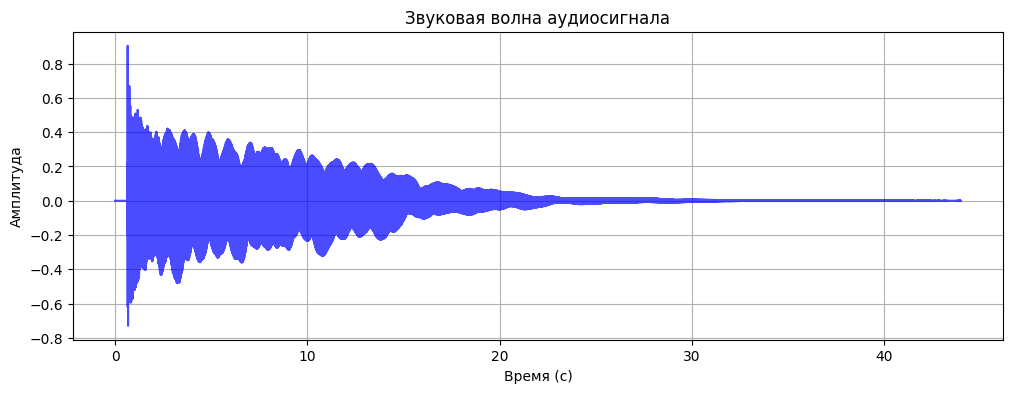

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


def plot_audio_signal(y: np.ndarray, sr: int, title: str, color: str = "blue") -> None:
    t = np.linspace(0, len(y) / sr, num=len(y))

    plt.figure(figsize=(12, 4))
    plt.plot(t, y, alpha=0.7, color=color)
    plt.title(title)
    plt.xlabel("Время (с)")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.show()


plot_audio_signal(y=y, sr=sr, title="Звуковая волна аудиосигнала")

Audio(y, rate=sr)

У аналогового звука, который наш мозг воспринимает с помощью барабанной перепонки и внутреннего уха (ДОПОЛНИТЬ/УБРАТЬ), есть следующие основные характеристики:

- Частота (frequency) - определяет высоту звука, измеряется в Герцах (Гц)
- Амплитуда (amplitude) - отвечает за громкость (чем выше амплитуда, тем громче звук)
- Фаза (Phase) - в какой момент “начинается” колебание (волна) относительно определённой точки времени

(Показать пример противофазы?)

## Частота (Frequency)
Для наглядности давайте значительно увеличим масштаб чтобы получше разглядеть как выглядит волна.

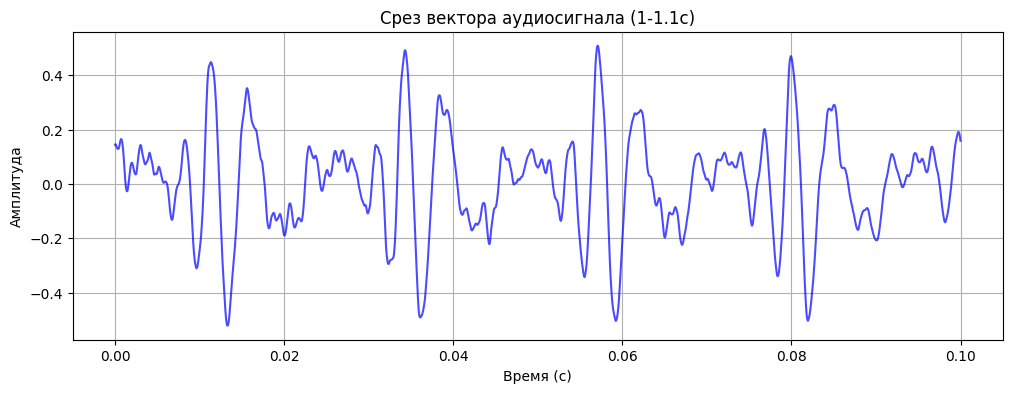

In [ ]:
# Так как частота дискретизации определяет сколько значений y будет содержаться об 1 секунде аудио,
# для более детального рассмотрения получим срез вектора, раный аудиосигналу от 1 до 1.1 секунды таким образом:
y_trimmed = y[sr:int(sr * 1.1)]

plot_audio_signal(y=y_trimmed, sr=sr, title="Срез вектора аудиосигнала (1 - 1.1c)")
Audio(y, rate=sr)

В реальной жизни звуковая волна — это не идеальная синусоида, которую можно было видеть в школьном учебнике физики, а совокупность множества частот (гармоник, обертонов и даже шума). Каждая музыкальная нота или человеческий голос имеет сложный «рисунок» волны

Частота — это то, сколько раз волна повторяет свой цикл в единицу времени (секунду).
1 цикл (полное «вверх-вниз» колебание) = 
𝑇
T секунд = период.
Чем короче 
𝑇
T, тем выше частота (а значит, волна «колеблется» быстрее).
Без спектрограммы мы можем увидеть эту «скорость колебаний» просто посмотрев, как часто синусоида повторяет форму.

### А теперь давайте увеличим частоту вдвое и посмотим (и послушаем) что получится!

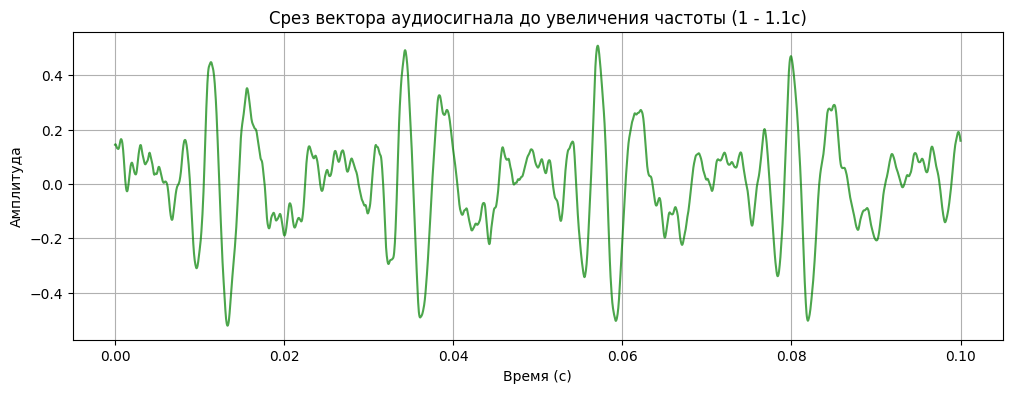

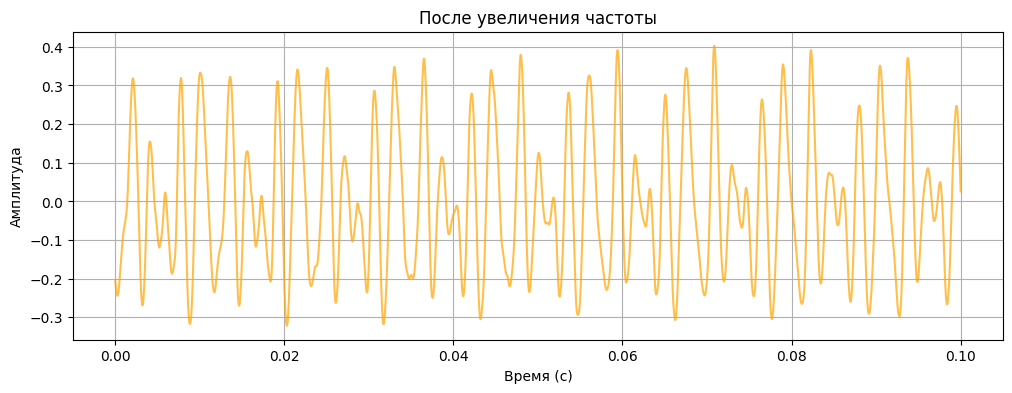

In [74]:
y_pitched = y[::2]
y_pitched_trimmed = y_pitched[sr:int(sr * 1.1)]

plot_audio_signal(y=y_trimmed, sr=sr, color="green", title="Срез вектора аудиосигнала до увеличения частоты (1 - 1.1с)")
plot_audio_signal(y=y_pitched_trimmed, sr=sr, color="orange", title="После увеличения частоты")
Audio(y_pitched, rate=sr, normalize=False)

Как мы можем слышать, при увеличении частоты вдвое звук стал выше на октаву

### Амплитуда (Amplitude)

Амплитуда — это максимальное «отклонение» волны от среднего уровня (здесь 0). Чем больше амплитуда, тем «громче» (мощнее) колебания. На графике она соответствует вершинам (пику +1) и впадинам (пику -1) синусоиды. Попробуем уменьшить амплитуду сигнала, уменьшив все значения вектора в 2 раза

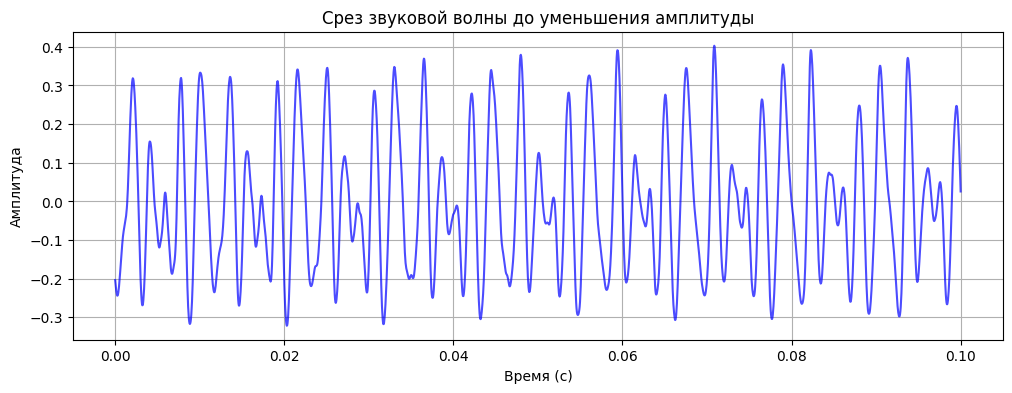

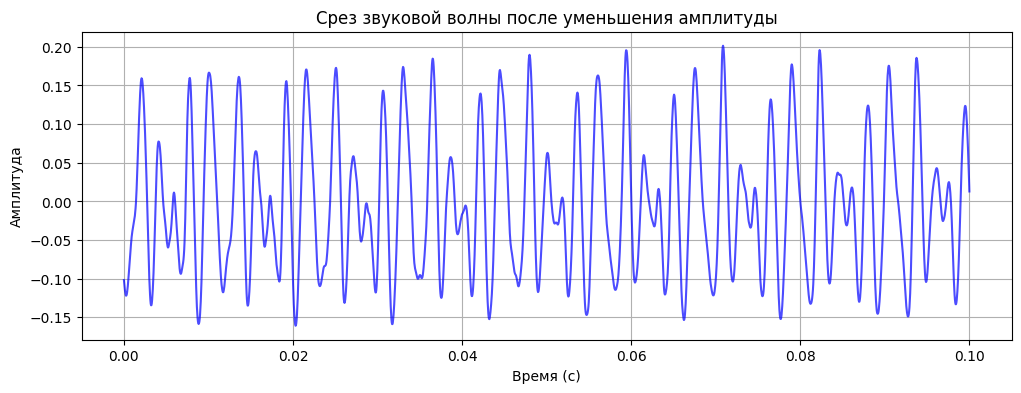

In [76]:
y_pitched_quieter = y_pitched * 0.5
y_pitched_quieter_trimmed = y_pitched_quieter[sr:int(sr * 1.1)]

plot_audio_signal(y=y_pitched_trimmed, sr=sr, title="Срез звуковой волны до уменьшения амплитуды")
plot_audio_signal(y=y_pitched_quieter_trimmed, sr=sr, title="Срез звуковой волны после уменьшения амплитуды")
# Флаг normalize важен, так как без него библиотека нормализует значения вектора, сделав звук громче
Audio(y_pitched_quieter, rate=sr, normalize=False)

### Спектрограмма

У оцифрованного звука появляется ещё ряд новых важных для нас характеристик:
- Sample Rate
- Bitrate